# Importing Required Libraries


In [ ]:
import pandas as pd
import random
import numpy as np
import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline
# to generate your own dataset uncomment this code
# data = {'Feature1':[random.uniform(0, 6) for i in range(100)], 'Feature2':[random.uniform(0, 6) for i in range(100)], 'Feature3':[random.uniform(0, 6) for i in range(100)], 'Feature4':[random.uniform(0,6) for i in range(100)],'Output':[round(random.random()) for i in range(100)]}
# df = pd.DataFrame(data)

# Load Dataset

In [ ]:
#load Dataset
#df = pd.read_csv("data_d.csv")
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis and Visualisation

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

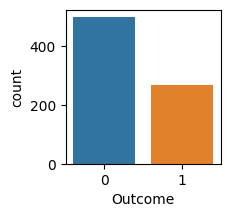

In [ ]:
#countplot
#ax = sns.countplot(df["diagnosis"],label="Count")
f, ax = plt.subplots(figsize=(2, 2))
sns.countplot(df, x="Outcome", ax=ax)

<Axes: >

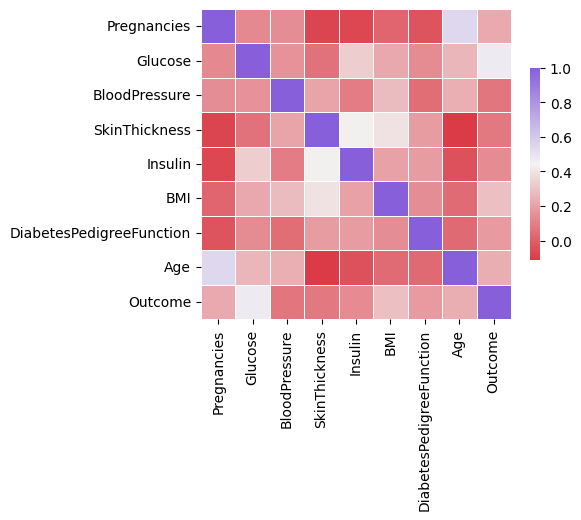

In [ ]:
#Correlation matrix
corr = df.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(10, 275, as_cmap=True)

sns.heatmap(corr, cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)

# Data Preprocessing

In [ ]:
#preprocessing

zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)


cols_to_drop = ['Age', 'DiabetesPedigreeFunction']
df = df.drop(cols_to_drop, axis=1)
df.shape

(768, 7)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
0,6,148.0,72.0,35.0,0,33.6,1
1,1,85.0,66.0,29.0,0,26.6,0
2,8,183.0,64.0,29.0,0,23.3,1
3,1,89.0,66.0,23.0,94,28.1,0
4,0,137.0,40.0,35.0,168,43.1,1


# Single Layer Perceptron Model

In [ ]:
#perceptron
from sklearn.metrics import accuracy_score
from random import randint
class Perceptron:
    def __init__(self,input_size,epochs=100,alpha=0.02,method='m3'):
        self.finals = []
        self.epochs = epochs
        self.alpha = alpha
#         self.input_size = input_size
        weight = [randint(1, 5) for i in range(input_size + 1)]
        weight[0] = 1.0
        self.weight = weight
        print("initial weight is ")
        print(weight)
        self.method = method
#         self.weight = np.zeros(input_size+1)
    def activation(self,x):
        return 1 if x>=0 else 0
    def predict(self,x):
#         print(self.weight.T)
#         print(X)
        z = np.dot(self.weight, x)
#         print(z)
#         print(self.activation(z))
        a = self.activation(z)
        return a


    def learn(self,X,d):
#         final = []
        for j in range(self.epochs):
            sum = 0
            for i in range(d.shape[0]):
                x = np.insert(X[i],0,1)
                y = self.predict(x)
                e = (d[i] - y)
                if self.method == 'm1':
                    if y == 0 and d[i] == 1:
                        self.weight = self.weight + x
                    elif y == 1 and d[i] == 0:
                        self.weight = self.weight - x
                elif self.method == 'm2':
                    if y == 0 and d[i] == 1:
                        self.weight = self.weight + self.alpha*x
                    elif y == 1 and d[i] == 0:
                        self.weight = self.weight - self.alpha*x
                else:
                    self.weight = self.weight + self.alpha*e*x
                sum = sum + e
            self.finals.append(abs(sum))
            # print("epoch = "+str(j)+"   error = "+str(abs(sum)))
#             print("Error" +str(sum))
#             print(self.weight)
        # print("learning curve")
        fig = plt.figure(figsize=(5, 5))
        plt.plot(range(self.epochs), self.finals)
        plt.show()

taking 2
--------------------------('Pregnancies', 'Glucose')------------------------
initial weight is 
[1.0, 4, 5]


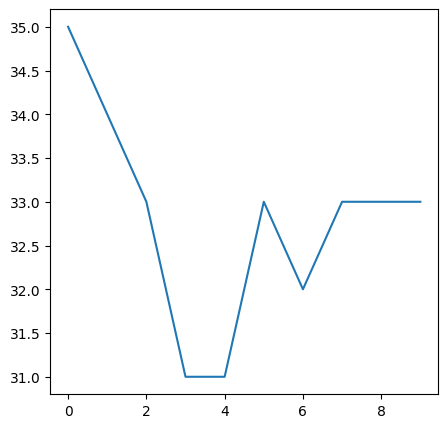

The learned weight is 
[-5.56  6.7  -1.14]
Learning Rate = 0.02
Training data Accuracy = 0.6536312849162011
Testing data Accuracy = 0.645021645021645
--------------------------('Pregnancies', 'BloodPressure')------------------------
initial weight is 
[1.0, 3, 4]


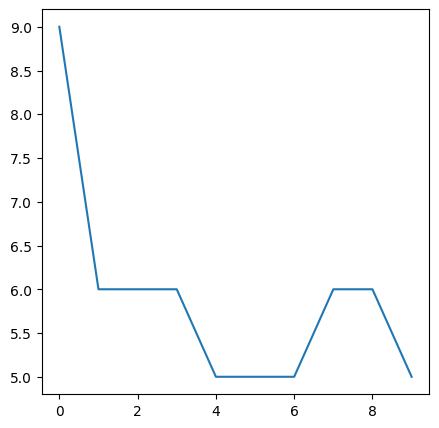

The learned weight is 
[-0.18  4.08 -0.64]
Learning Rate = 0.02
Training data Accuracy = 0.6741154562383612
Testing data Accuracy = 0.6103896103896104
--------------------------('Pregnancies', 'SkinThickness')------------------------
initial weight is 
[1.0, 4, 3]


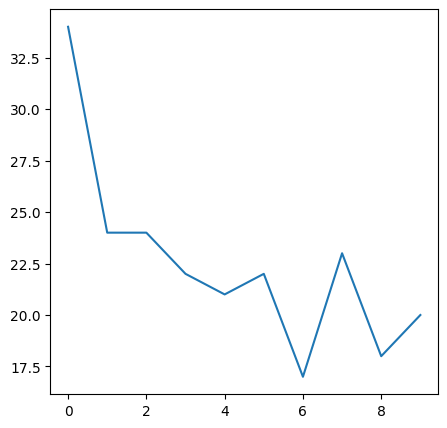

The learned weight is 
[-3.5   0.9   0.18]
Learning Rate = 0.02
Training data Accuracy = 0.37057728119180633
Testing data Accuracy = 0.4025974025974026
--------------------------('Pregnancies', 'Insulin')------------------------
initial weight is 
[1.0, 5, 3]


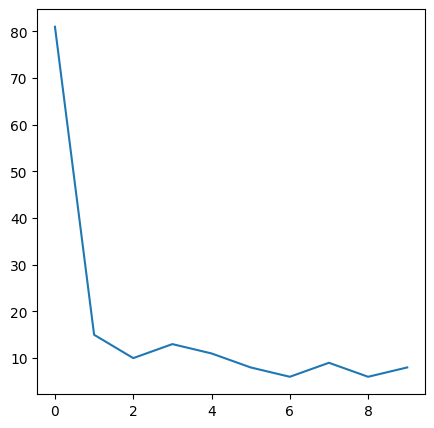

The learned weight is 
[-2.34  0.18  8.56]
Learning Rate = 0.02
Training data Accuracy = 0.47113594040968343
Testing data Accuracy = 0.4935064935064935
--------------------------('Pregnancies', 'BMI')------------------------
initial weight is 
[1.0, 4, 1]


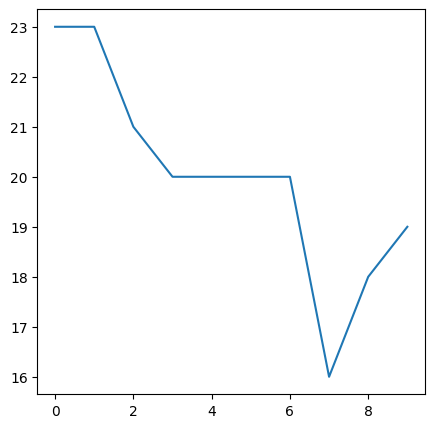

The learned weight is 
[-3.     0.36  -0.374]
Learning Rate = 0.02
Training data Accuracy = 0.6629422718808193
Testing data Accuracy = 0.6233766233766234
--------------------------('Glucose', 'BloodPressure')------------------------
initial weight is 
[1.0, 1, 3]


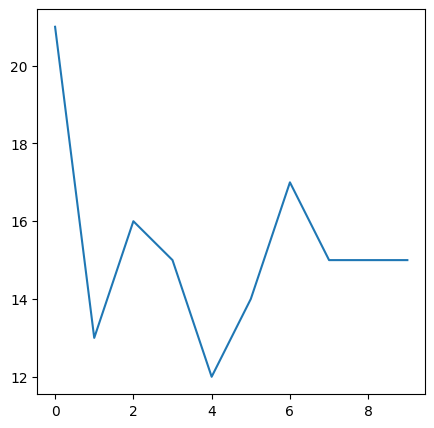

The learned weight is 
[-2.06  1.98 -7.86]
Learning Rate = 0.02
Training data Accuracy = 0.6443202979515829
Testing data Accuracy = 0.6666666666666666
--------------------------('Glucose', 'SkinThickness')------------------------
initial weight is 
[1.0, 3, 5]


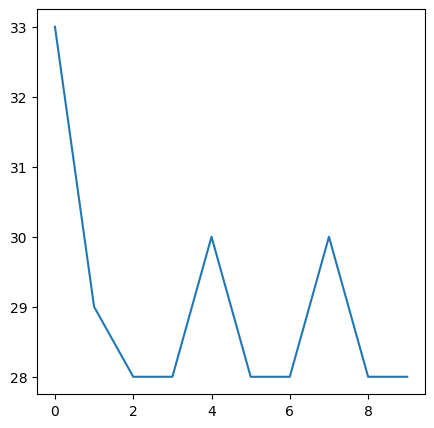

The learned weight is 
[-4.8  0.8 -4.2]
Learning Rate = 0.02
Training data Accuracy = 0.6294227188081937
Testing data Accuracy = 0.5974025974025974
--------------------------('Glucose', 'Insulin')------------------------
initial weight is 
[1.0, 5, 1]


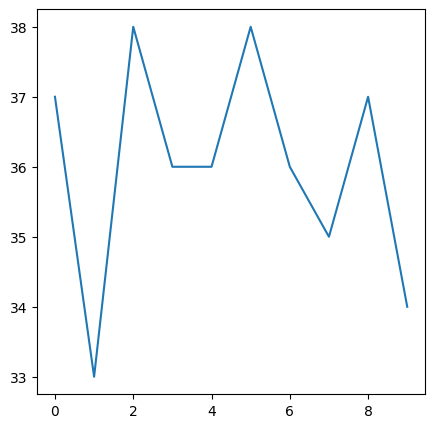

The learned weight is 
[-6.2   1.92 -0.16]
Learning Rate = 0.02
Training data Accuracy = 0.3407821229050279
Testing data Accuracy = 0.36796536796536794
--------------------------('Glucose', 'BMI')------------------------
initial weight is 
[1.0, 1, 2]


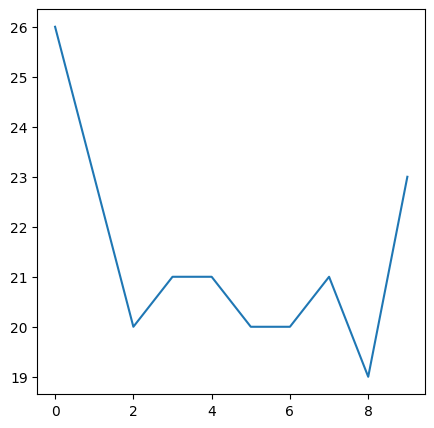

The learned weight is 
[-3.28  0.16 -4.85]
Learning Rate = 0.02
Training data Accuracy = 0.6405959031657356
Testing data Accuracy = 0.6753246753246753
--------------------------('BloodPressure', 'SkinThickness')------------------------
initial weight is 
[1.0, 3, 4]


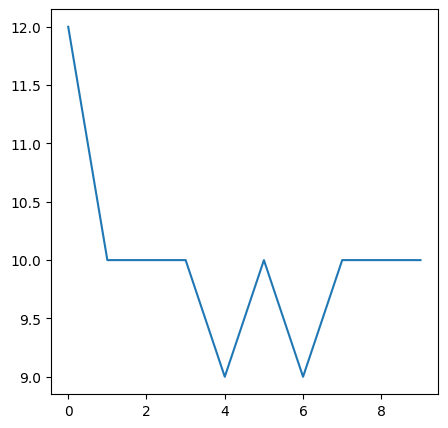

The learned weight is 
[-1.   -0.98  0.52]
Learning Rate = 0.02
Training data Accuracy = 0.664804469273743
Testing data Accuracy = 0.6190476190476191
--------------------------('BloodPressure', 'Insulin')------------------------
initial weight is 
[1.0, 5, 2]


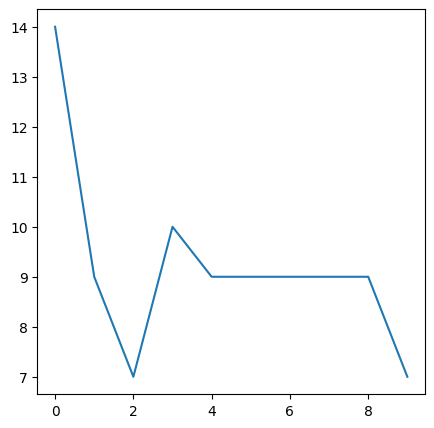

The learned weight is 
[-0.84 -0.22 -1.58]
Learning Rate = 0.02
Training data Accuracy = 0.6610800744878957
Testing data Accuracy = 0.6277056277056277
--------------------------('BloodPressure', 'BMI')------------------------
initial weight is 
[1.0, 3, 4]


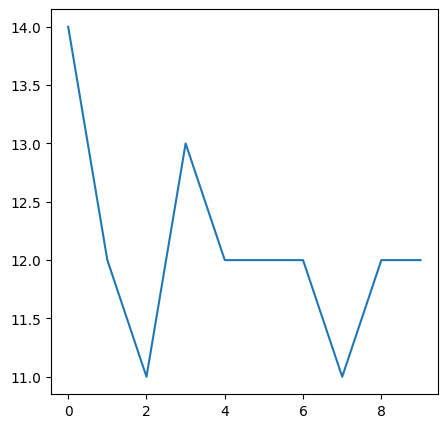

The learned weight is 
[-1.42  -1.92   1.292]
Learning Rate = 0.02
Training data Accuracy = 0.6629422718808193
Testing data Accuracy = 0.6277056277056277
--------------------------('SkinThickness', 'Insulin')------------------------
initial weight is 
[1.0, 3, 2]


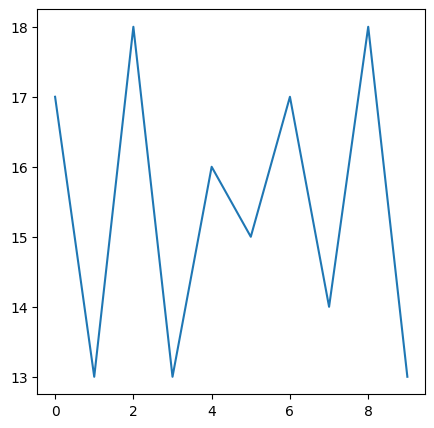

The learned weight is 
[-2.08 -0.02 -1.22]
Learning Rate = 0.02
Training data Accuracy = 0.6666666666666666
Testing data Accuracy = 0.6147186147186147
--------------------------('SkinThickness', 'BMI')------------------------
initial weight is 
[1.0, 5, 2]


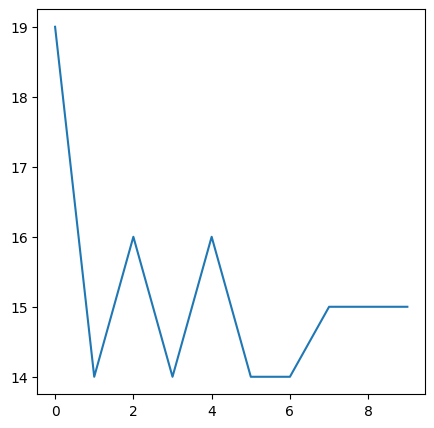

The learned weight is 
[-2.04   0.26   0.874]
Learning Rate = 0.02
Training data Accuracy = 0.3649906890130354
Testing data Accuracy = 0.3116883116883117
--------------------------('Insulin', 'BMI')------------------------
initial weight is 
[1.0, 2, 2]


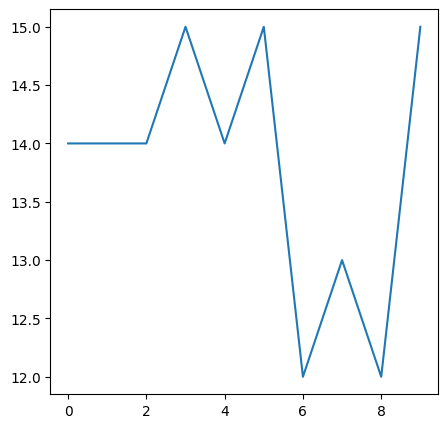

The learned weight is 
[-1.76  -4.32   0.266]
Learning Rate = 0.02
Training data Accuracy = 0.5363128491620112
Testing data Accuracy = 0.4935064935064935
taking 3
--------------------------('Pregnancies', 'Glucose', 'BloodPressure')------------------------
initial weight is 
[1.0, 3, 2, 3]


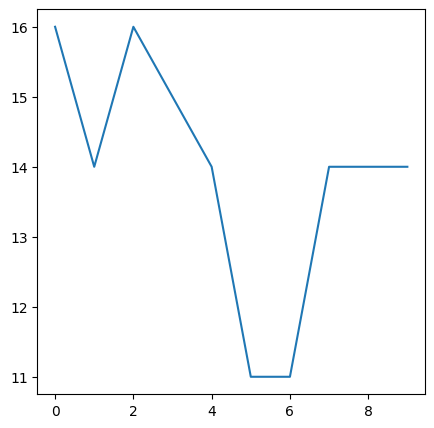

The learned weight is 
[-1.78 15.96  3.04 -8.54]
Learning Rate = 0.02
Training data Accuracy = 0.6629422718808193
Testing data Accuracy = 0.7186147186147186
--------------------------('Pregnancies', 'Glucose', 'SkinThickness')------------------------
initial weight is 
[1.0, 4, 1, 3]


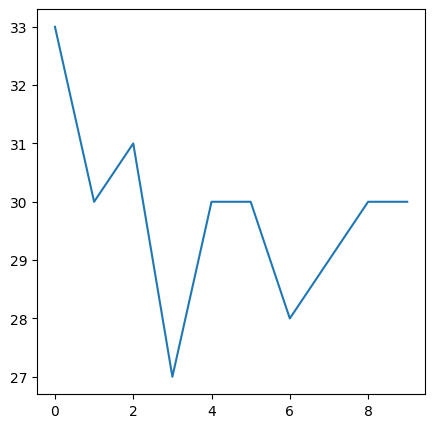

The learned weight is 
[-4.96  8.68  1.18 -6.42]
Learning Rate = 0.02
Training data Accuracy = 0.5921787709497207
Testing data Accuracy = 0.5974025974025974
--------------------------('Pregnancies', 'Glucose', 'Insulin')------------------------
initial weight is 
[1.0, 2, 3, 2]


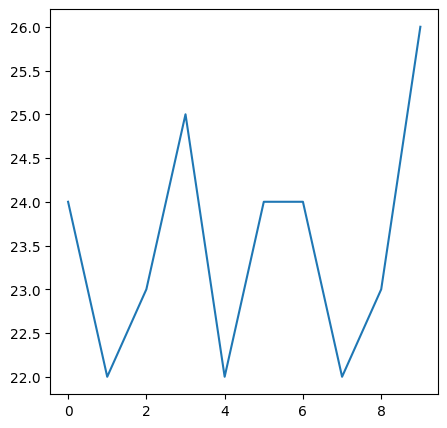

The learned weight is 
[-3.7   8.16 -1.92 -2.4 ]
Learning Rate = 0.02
Training data Accuracy = 0.6312849162011173
Testing data Accuracy = 0.696969696969697
--------------------------('Pregnancies', 'Glucose', 'BMI')------------------------
initial weight is 
[1.0, 5, 1, 4]


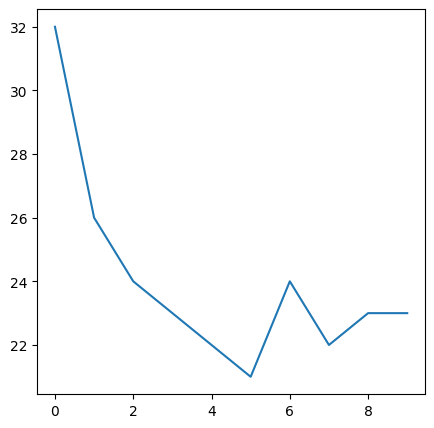

The learned weight is 
[-3.8  14.22  2.34 -8.42]
Learning Rate = 0.02
Training data Accuracy = 0.5139664804469274
Testing data Accuracy = 0.47619047619047616
--------------------------('Pregnancies', 'BloodPressure', 'SkinThickness')------------------------
initial weight is 
[1.0, 1, 4, 1]


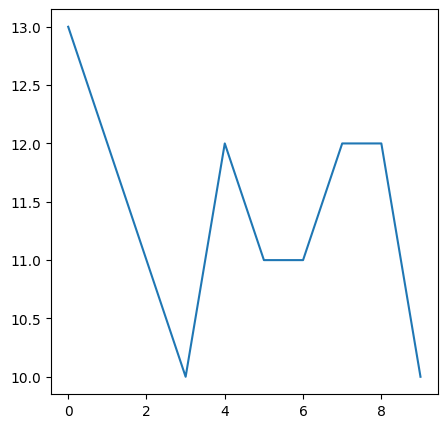

The learned weight is 
[-1.28  8.38  0.24  0.74]
Learning Rate = 0.02
Training data Accuracy = 0.35940409683426444
Testing data Accuracy = 0.3246753246753247
--------------------------('Pregnancies', 'BloodPressure', 'Insulin')------------------------
initial weight is 
[1.0, 4, 5, 1]


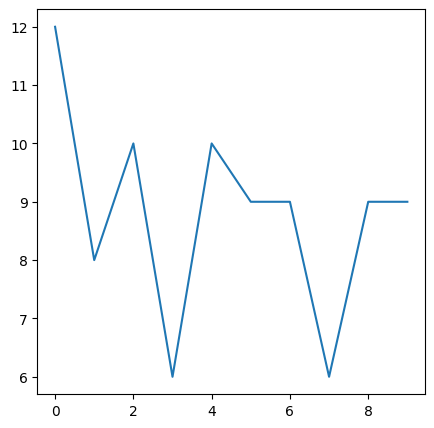

The learned weight is 
[-0.76 11.16 -0.24 -1.06]
Learning Rate = 0.02
Training data Accuracy = 0.5456238361266295
Testing data Accuracy = 0.6190476190476191
--------------------------('Pregnancies', 'BloodPressure', 'BMI')------------------------
initial weight is 
[1.0, 4, 5, 4]


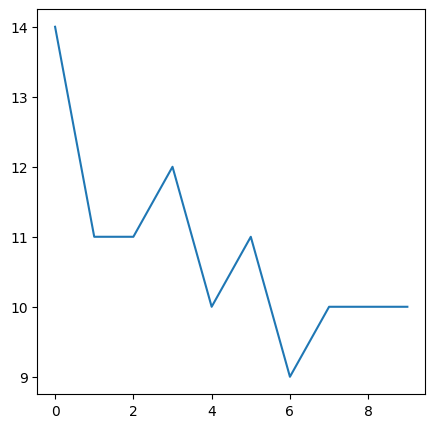

The learned weight is 
[-1.16  8.88 -0.54  3.67]
Learning Rate = 0.02
Training data Accuracy = 0.34823091247672255
Testing data Accuracy = 0.35064935064935066
--------------------------('Pregnancies', 'SkinThickness', 'Insulin')------------------------
initial weight is 
[1.0, 3, 1, 3]


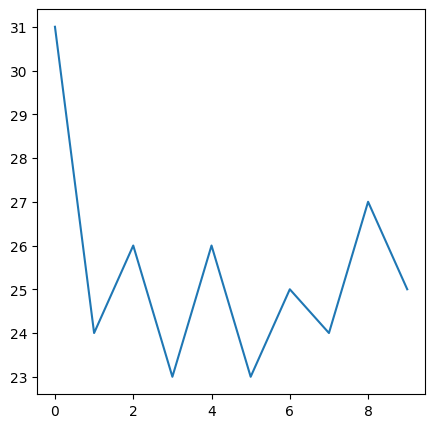

The learned weight is 
[ -4.08   1.76  -1.54 -11.46]
Learning Rate = 0.02
Training data Accuracy = 0.6536312849162011
Testing data Accuracy = 0.645021645021645
--------------------------('Pregnancies', 'SkinThickness', 'BMI')------------------------
initial weight is 
[1.0, 4, 3, 3]


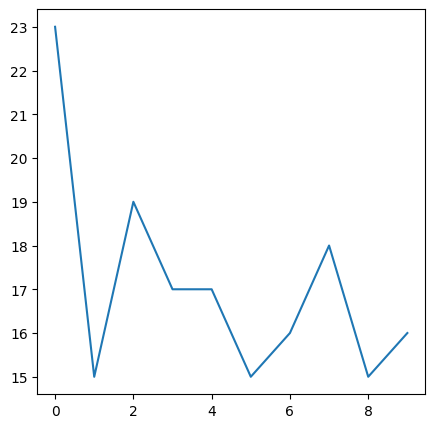

The learned weight is 
[-2.42   2.3   -1.    -0.052]
Learning Rate = 0.02
Training data Accuracy = 0.6517690875232774
Testing data Accuracy = 0.645021645021645
--------------------------('Pregnancies', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 1, 2, 4]


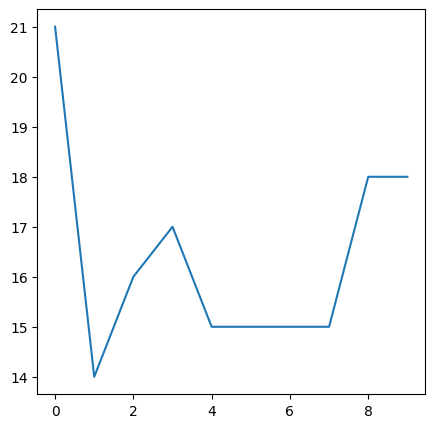

The learned weight is 
[-2.28   2.42  -3.02  -0.676]
Learning Rate = 0.02
Training data Accuracy = 0.638733705772812
Testing data Accuracy = 0.6277056277056277
--------------------------('Glucose', 'BloodPressure', 'SkinThickness')------------------------
initial weight is 
[1.0, 1, 2, 1]


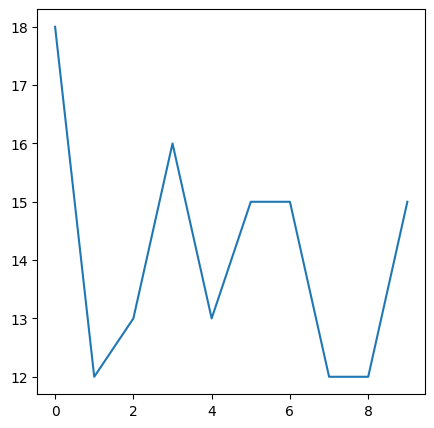

The learned weight is 
[ -1.82   6.08 -10.48   2.62]
Learning Rate = 0.02
Training data Accuracy = 0.6256983240223464
Testing data Accuracy = 0.5324675324675324
--------------------------('Glucose', 'BloodPressure', 'Insulin')------------------------
initial weight is 
[1.0, 5, 2, 4]


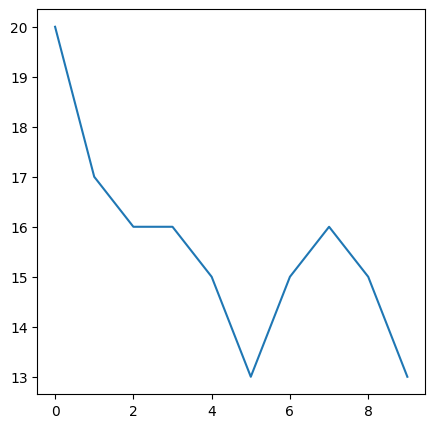

The learned weight is 
[ -2.12  11.3  -12.44  -3.18]
Learning Rate = 0.02
Training data Accuracy = 0.4767225325884544
Testing data Accuracy = 0.4935064935064935
--------------------------('Glucose', 'BloodPressure', 'BMI')------------------------
initial weight is 
[1.0, 2, 1, 2]


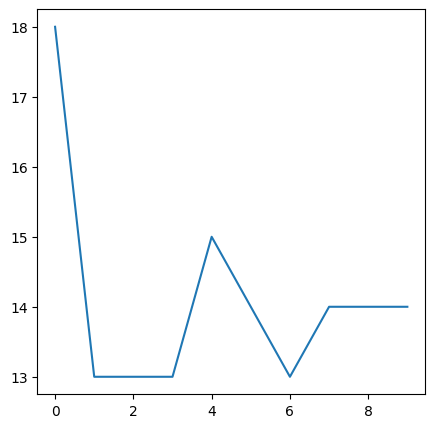

The learned weight is 
[-1.82   6.1   -6.04   0.534]
Learning Rate = 0.02
Training data Accuracy = 0.3612662942271881
Testing data Accuracy = 0.39826839826839827
--------------------------('Glucose', 'SkinThickness', 'Insulin')------------------------
initial weight is 
[1.0, 2, 4, 3]


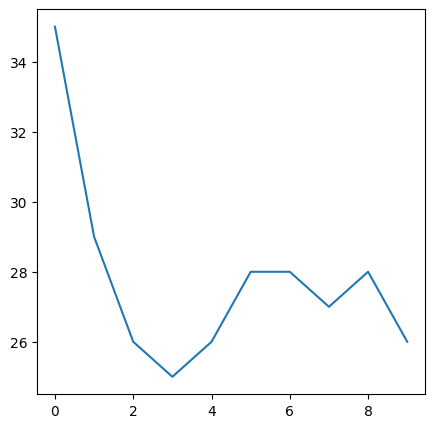

The learned weight is 
[-4.56  0.88 -8.98 -3.5 ]
Learning Rate = 0.02
Training data Accuracy = 0.6424581005586593
Testing data Accuracy = 0.670995670995671
--------------------------('Glucose', 'SkinThickness', 'BMI')------------------------
initial weight is 
[1.0, 3, 1, 4]


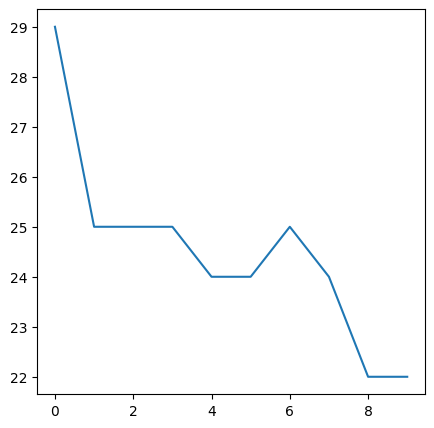

The learned weight is 
[-3.9    2.1   -2.02  -3.572]
Learning Rate = 0.02
Training data Accuracy = 0.40409683426443205
Testing data Accuracy = 0.4588744588744589
--------------------------('Glucose', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 5, 4, 4]


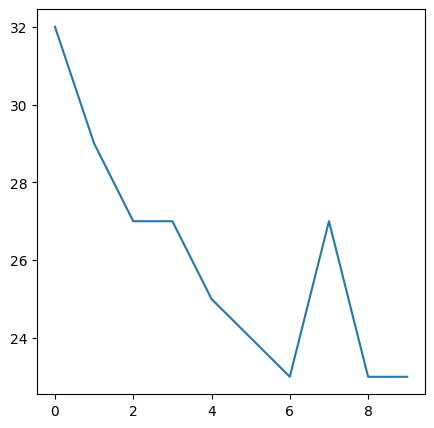

The learned weight is 
[ -4.2     1.02   -1.46  -12.472]
Learning Rate = 0.02
Training data Accuracy = 0.6405959031657356
Testing data Accuracy = 0.6753246753246753
--------------------------('BloodPressure', 'SkinThickness', 'Insulin')------------------------
initial weight is 
[1.0, 3, 5, 1]


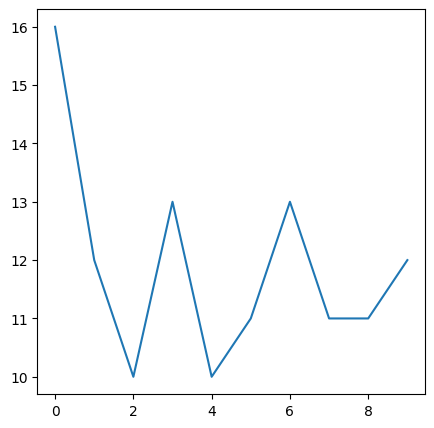

The learned weight is 
[-1.38 -3.58  3.98 -2.3 ]
Learning Rate = 0.02
Training data Accuracy = 0.6126629422718808
Testing data Accuracy = 0.7445887445887446
--------------------------('BloodPressure', 'SkinThickness', 'BMI')------------------------
initial weight is 
[1.0, 5, 4, 1]


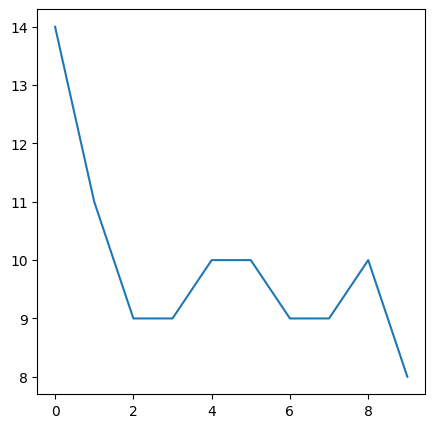

The learned weight is 
[-0.98  -1.56  -0.32   2.582]
Learning Rate = 0.02
Training data Accuracy = 0.6517690875232774
Testing data Accuracy = 0.645021645021645
--------------------------('BloodPressure', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 5, 4, 2]


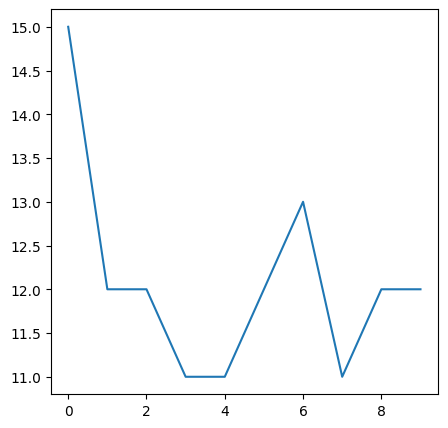

The learned weight is 
[-1.42  -1.9    2.54   4.748]
Learning Rate = 0.02
Training data Accuracy = 0.43202979515828677
Testing data Accuracy = 0.4805194805194805
--------------------------('SkinThickness', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 3, 2, 1]


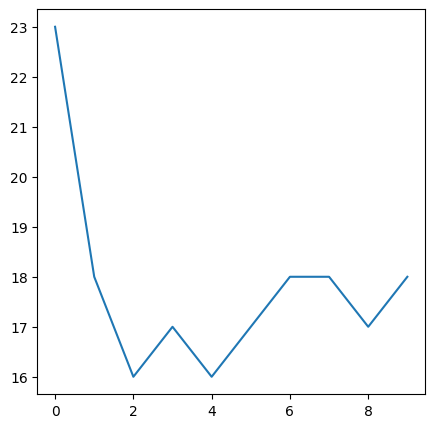

The learned weight is 
[-2.56  -0.24  -0.08   0.844]
Learning Rate = 0.02
Training data Accuracy = 0.34450651769087526
Testing data Accuracy = 0.3463203463203463
taking 4
--------------------------('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness')------------------------
initial weight is 
[1.0, 5, 1, 2, 3]


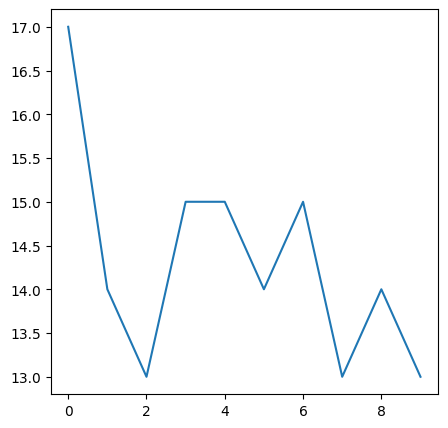

The learned weight is 
[-1.86 12.52  2.26 -5.4   1.78]
Learning Rate = 0.02
Training data Accuracy = 0.6741154562383612
Testing data Accuracy = 0.7056277056277056
--------------------------('Pregnancies', 'Glucose', 'BloodPressure', 'Insulin')------------------------
initial weight is 
[1.0, 4, 1, 5, 4]


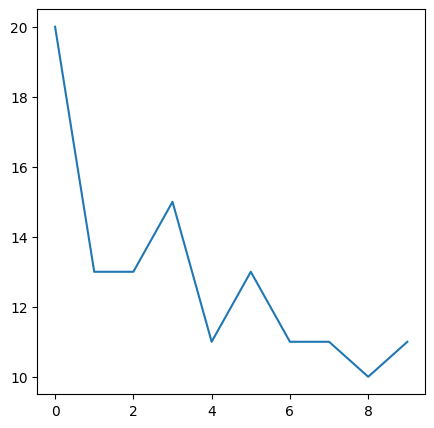

The learned weight is 
[ -1.56  24.42   4.06 -16.34   3.22]
Learning Rate = 0.02
Training data Accuracy = 0.6778398510242085
Testing data Accuracy = 0.6103896103896104
--------------------------('Pregnancies', 'Glucose', 'BloodPressure', 'BMI')------------------------
initial weight is 
[1.0, 5, 3, 2, 1]


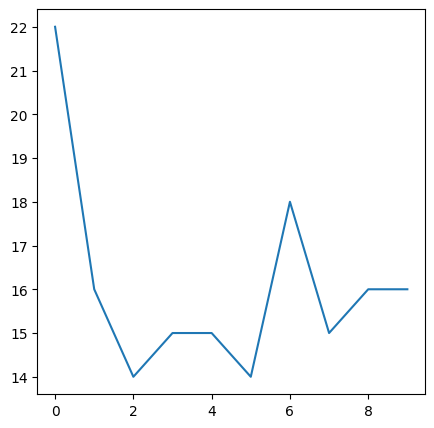

The learned weight is 
[ -2.22   17.76    2.24  -10.5     1.582]
Learning Rate = 0.02
Training data Accuracy = 0.6368715083798883
Testing data Accuracy = 0.6883116883116883
--------------------------('Pregnancies', 'Glucose', 'SkinThickness', 'Insulin')------------------------
initial weight is 
[1.0, 4, 4, 2, 5]


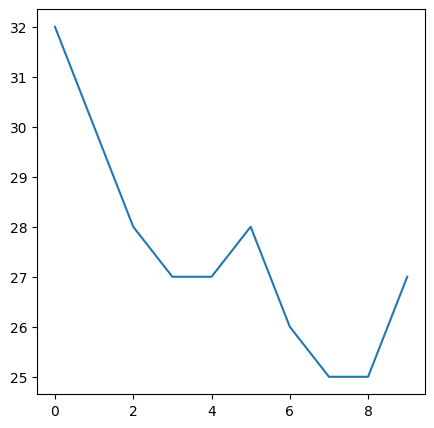

The learned weight is 
[-4.5   9.22 -2.16 -9.16 -3.22]
Learning Rate = 0.02
Training data Accuracy = 0.6461824953445066
Testing data Accuracy = 0.6623376623376623
--------------------------('Pregnancies', 'Glucose', 'SkinThickness', 'BMI')------------------------
initial weight is 
[1.0, 1, 1, 5, 5]


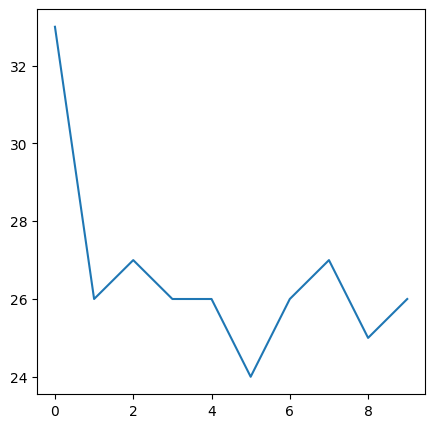

The learned weight is 
[-4.32   9.94  -0.06   0.58  -3.274]
Learning Rate = 0.02
Training data Accuracy = 0.6499068901303539
Testing data Accuracy = 0.6017316017316018
--------------------------('Pregnancies', 'Glucose', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 1, 2, 2, 4]


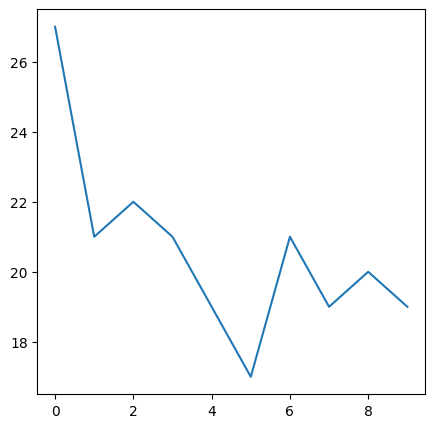

The learned weight is 
[ -3.12   13.12    3.04    2.98  -10.622]
Learning Rate = 0.02
Training data Accuracy = 0.4171322160148976
Testing data Accuracy = 0.3852813852813853
--------------------------('Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin')------------------------
initial weight is 
[1.0, 4, 4, 5, 2]


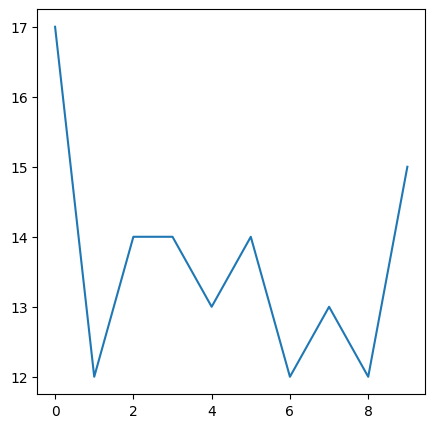

The learned weight is 
[-1.72  9.64 -3.08  4.86 -3.84]
Learning Rate = 0.02
Training data Accuracy = 0.6797020484171322
Testing data Accuracy = 0.6103896103896104
--------------------------('Pregnancies', 'BloodPressure', 'SkinThickness', 'BMI')------------------------
initial weight is 
[1.0, 5, 4, 5, 3]


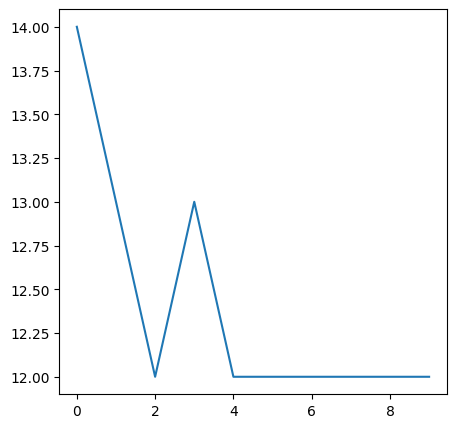

The learned weight is 
[-1.48   2.66  -0.9    2.84   2.478]
Learning Rate = 0.02
Training data Accuracy = 0.3463687150837989
Testing data Accuracy = 0.354978354978355
--------------------------('Pregnancies', 'BloodPressure', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 3, 2, 1, 2]


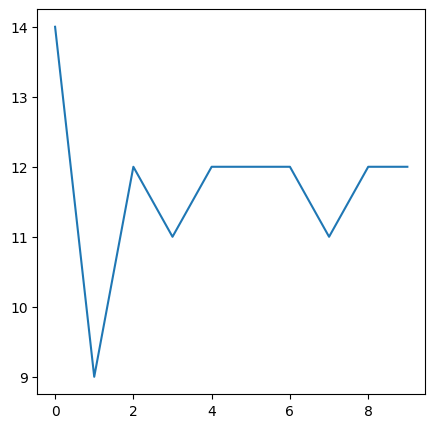

The learned weight is 
[-1.34  13.46  -3.9    3.82   4.044]
Learning Rate = 0.02
Training data Accuracy = 0.5065176908752328
Testing data Accuracy = 0.4588744588744589
--------------------------('Pregnancies', 'SkinThickness', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 5, 1, 1, 4]


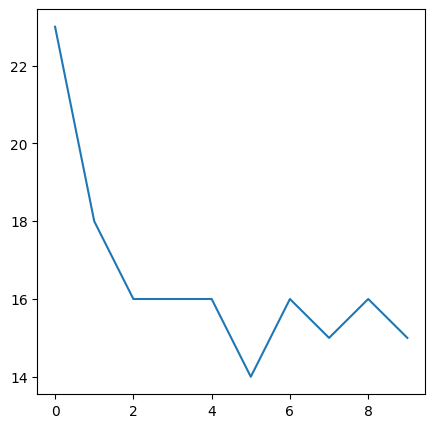

The learned weight is 
[-2.3    4.14  -1.72  -0.04  -3.134]
Learning Rate = 0.02
Training data Accuracy = 0.6443202979515829
Testing data Accuracy = 0.6666666666666666
--------------------------('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin')------------------------
initial weight is 
[1.0, 3, 1, 3, 1]


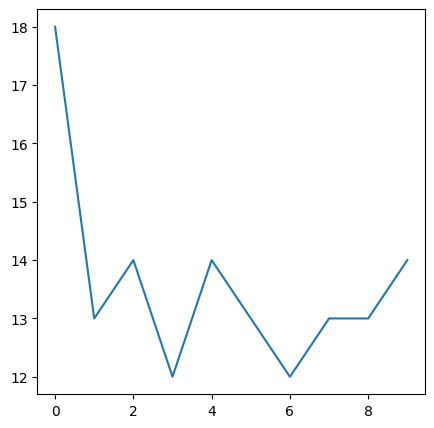

The learned weight is 
[ -1.72   9.88 -12.12   5.08   0.98]
Learning Rate = 0.02
Training data Accuracy = 0.3929236499068901
Testing data Accuracy = 0.3463203463203463
--------------------------('Glucose', 'BloodPressure', 'SkinThickness', 'BMI')------------------------
initial weight is 
[1.0, 3, 5, 4, 2]


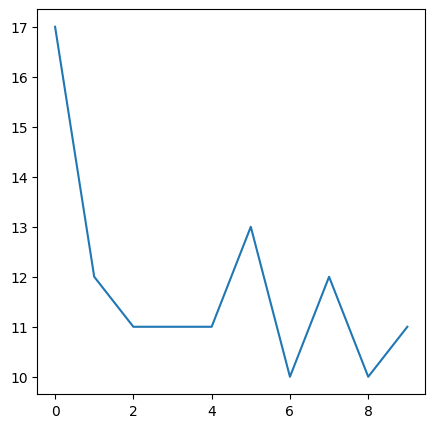

The learned weight is 
[-1.36   4.74  -6.74  -5.     3.036]
Learning Rate = 0.02
Training data Accuracy = 0.6108007448789572
Testing data Accuracy = 0.6147186147186147
--------------------------('Glucose', 'BloodPressure', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 1, 2, 5, 2]


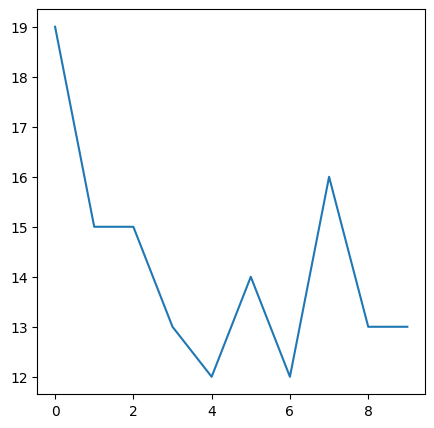

The learned weight is 
[ -1.84    3.82  -18.88    2.5     4.684]
Learning Rate = 0.02
Training data Accuracy = 0.6666666666666666
Testing data Accuracy = 0.645021645021645
--------------------------('Glucose', 'SkinThickness', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 5, 5, 1, 4]


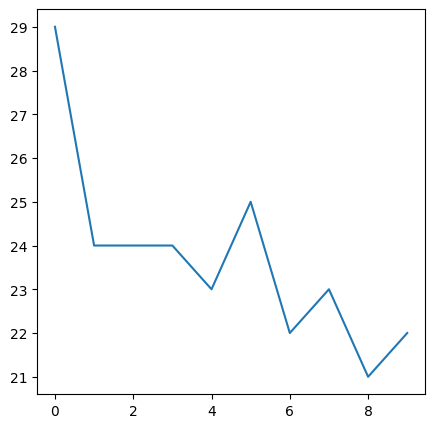

The learned weight is 
[ -3.74    5.46   -0.76   -4.16  -10.956]
Learning Rate = 0.02
Training data Accuracy = 0.5139664804469274
Testing data Accuracy = 0.47619047619047616
--------------------------('BloodPressure', 'SkinThickness', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 4, 2, 2, 1]


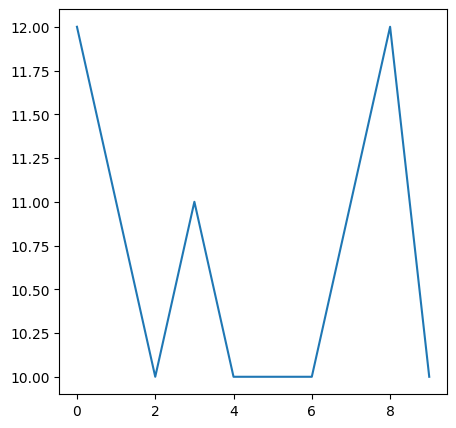

The learned weight is 
[-1.14 -3.9   0.48 -1.62  5.09]
Learning Rate = 0.02
Training data Accuracy = 0.6517690875232774
Testing data Accuracy = 0.658008658008658
taking 5
--------------------------('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin')------------------------
initial weight is 
[1.0, 5, 2, 1, 5, 2]


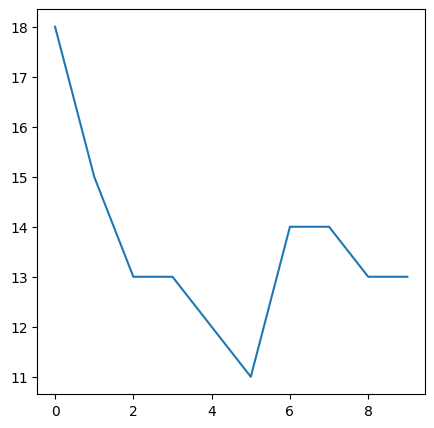

The learned weight is 
[ -1.72  20.2    9.94 -10.22   2.34  -1.72]
Learning Rate = 0.02
Training data Accuracy = 0.3649906890130354
Testing data Accuracy = 0.3939393939393939
--------------------------('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI')------------------------
initial weight is 
[1.0, 5, 3, 2, 3, 1]


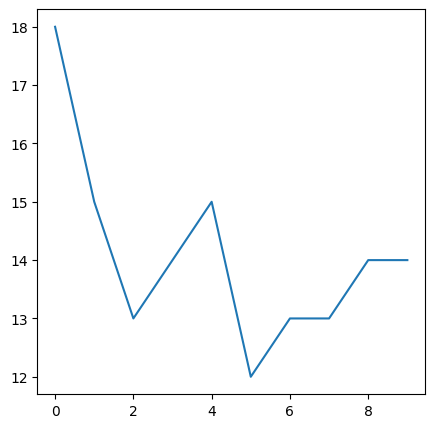

The learned weight is 
[-1.82  13.12   4.36  -9.26   0.54   3.852]
Learning Rate = 0.02
Training data Accuracy = 0.5996275605214153
Testing data Accuracy = 0.696969696969697
--------------------------('Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 1, 4, 2, 4, 2]


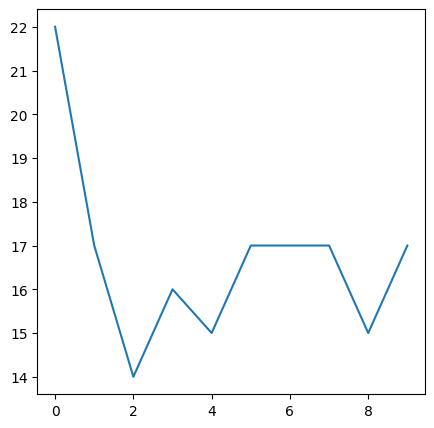

The learned weight is 
[ -2.34   22.92    7.16  -17.4     2.86    0.408]
Learning Rate = 0.02
Training data Accuracy = 0.6499068901303539
Testing data Accuracy = 0.6320346320346321
--------------------------('Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 3, 3, 4, 4, 1]


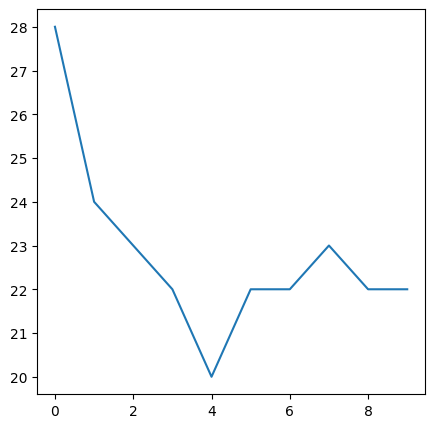

The learned weight is 
[-3.56   6.88  -0.88  -8.16   0.56  -1.584]
Learning Rate = 0.02
Training data Accuracy = 0.6350093109869647
Testing data Accuracy = 0.696969696969697
--------------------------('Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 4, 1, 4, 2, 2]


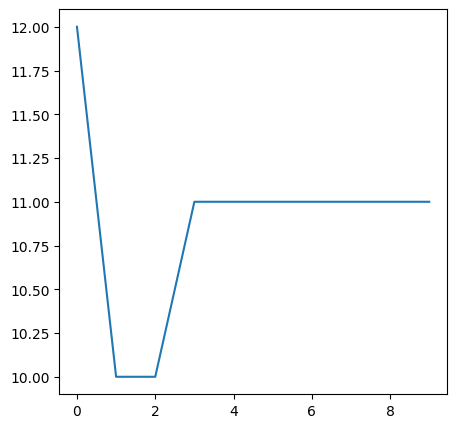

The learned weight is 
[-1.18  19.68  -6.84   0.28   2.04   7.748]
Learning Rate = 0.02
Training data Accuracy = 0.5661080074487895
Testing data Accuracy = 0.6017316017316018
--------------------------('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 4, 1, 4, 3, 5]


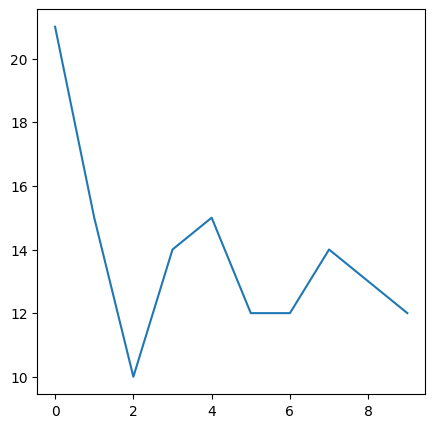

The learned weight is 
[ -1.76   13.76  -18.04    0.08   -1.54    5.078]
Learning Rate = 0.02
Training data Accuracy = 0.441340782122905
Testing data Accuracy = 0.4199134199134199
taking 6
--------------------------('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI')------------------------
initial weight is 
[1.0, 5, 4, 5, 5, 1, 4]


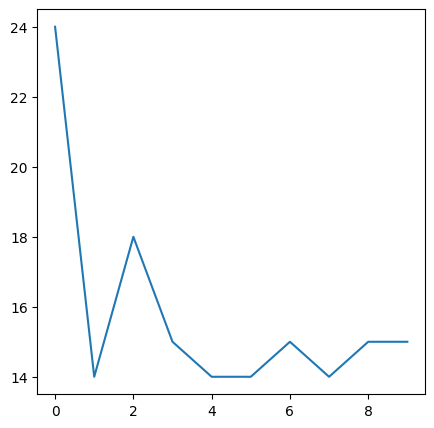

The learned weight is 
[ -2.16  17.6    9.02 -14.12  -5.5    0.26   2.3 ]
Learning Rate = 0.02
Training data Accuracy = 0.6256983240223464
Testing data Accuracy = 0.6190476190476191


In [ ]:
if __name__ == '__main__':
    from itertools import combinations
    for n in range(2, len(df.columns[:-1]) + 1):
        comb = combinations(df.columns[:-1], n)
        print(f'taking {n}')
        for e in comb:
            print(f'--------------------------{e}------------------------')
            df_tmp = df[list(e) + ['Outcome']]
            # print(df_tmp)
            d = df_tmp['Outcome'].values
            X = df_tmp.drop('Outcome',axis=1).values
            X_train, X_test, y_train, y_test = train_test_split(X, d, test_size=0.30)

            input_size = n
            learning_rate = 0.02
            iterations = 10
            perceptron = Perceptron(input_size=input_size, alpha = learning_rate,epochs = iterations)
            perceptron.learn(X_train, y_train)


            print("The learned weight is ")
            print(perceptron.weight)

            print("Learning Rate = "+str(learning_rate))
            y_pred_train = []
            for i in range(X_train.shape[0]):
                x= np.insert(X_train[i],0,1)
                y_pred_train.append(perceptron.predict(x))


            print("Training data Accuracy = " +str(accuracy_score(y_train, y_pred_train)))
            conftrain = confusion_matrix(y_train,y_pred_train)

            y_pred_test = []
            finals2 = []

            for i in range(X_test.shape[0]):
                x= np.insert(X_test[i],0,1)
                y_pred_test.append(perceptron.predict(x))
            #     print(y_pred_test)
            # print("Hi");print(X_train)
            # print(X_train)
            # print(y_train)
            # print(y_pred_train)

            # print(y_pred)
            print("Testing data Accuracy = " +str(accuracy_score(y_test, y_pred_test)))
            conftest = confusion_matrix(y_test, y_pred_test)

# Split ds

In [ ]:
df_tmp = df[['Pregnancies', 'Glucose', 'Outcome']]
# print(df_tmp)
d = df_tmp['Outcome'].values
X = df_tmp.drop('Outcome',axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,d, test_size=0.1)

initial weight is 
[1.0, 4, 1]


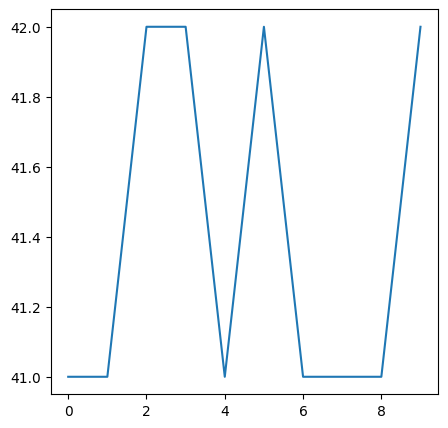

The learned weight is 
[-413.  271.  -57.]
Learning Rate = 0.02
Training data Accuracy = 0.6526772793053546
Testing data Accuracy = 0.6363636363636364
initial weight is 
[1.0, 1, 1]


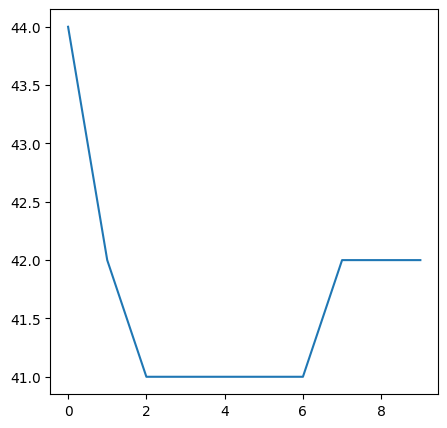

The learned weight is 
[-7.34  4.54 -1.12]
Learning Rate = 0.02
Training data Accuracy = 0.6526772793053546
Testing data Accuracy = 0.6363636363636364
initial weight is 
[1.0, 2, 2]


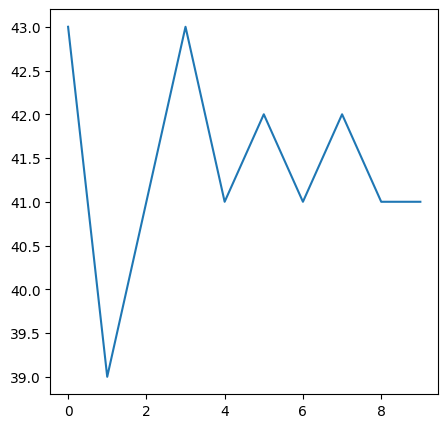

The learned weight is 
[-7.28  5.38 -0.68]
Learning Rate = 0.02
Training data Accuracy = 0.6512301013024602
Testing data Accuracy = 0.6363636363636364


In [ ]:
#perceptron
from sklearn.metrics import accuracy_score
from random import randint

if __name__ == '__main__':
    input_size = 2
    learning_rate = 0.02
    iterations = 10

    for i in range(1, 4):
        perceptron = Perceptron(input_size=input_size, alpha = learning_rate,epochs = iterations, method=f'm{i}')
        perceptron.learn(X_train, y_train)


        print("The learned weight is ")
        print(perceptron.weight)

        print("Learning Rate = "+str(learning_rate))
        y_pred_train = []
        for i in range(X_train.shape[0]):
            x= np.insert(X_train[i],0,1)
            y_pred_train.append(perceptron.predict(x))


        print("Training data Accuracy = " +str(accuracy_score(y_train, y_pred_train)))
        conftrain = confusion_matrix(y_train,y_pred_train)

        y_pred_test = []
        finals2 = []

        for i in range(X_test.shape[0]):
            x= np.insert(X_test[i],0,1)
            y_pred_test.append(perceptron.predict(x))


      print("Testing data Accuracy = " +str(accuracy_score(y_test, y_pred_test)))
        conftest = confusion_matrix(y_test, y_pred_test)

# Evaluation Metrics

Confusion Matrix:Training Data
Confusion Matrix:Testing Data


<Axes: >

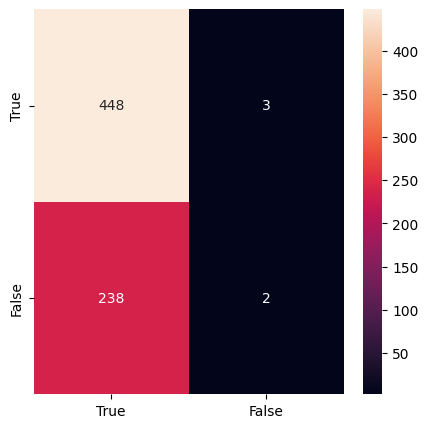

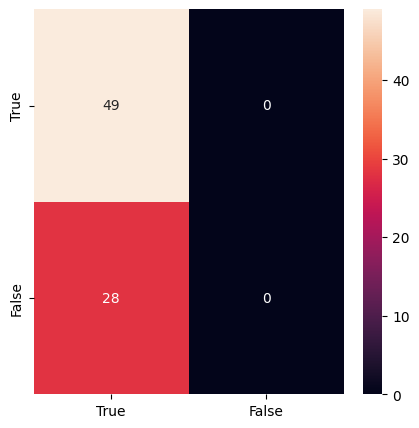

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
print("Confusion Matrix:Training Data")
df_cm = pd.DataFrame(conftrain, index = [i for i in ("True","False")],
                  columns = [i for i in ("True","False")])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True, fmt='.0f')

print("Confusion Matrix:Testing Data")
df_cm = pd.DataFrame(conftest, index = [i for i in ("True","False")],
                  columns = [i for i in ("True","False")])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True, fmt='.0f')

# Getting Top 5 Features

In [ ]:
# print(df_tmp)
d = df['Outcome'].values
X = df.drop('Outcome',axis=1).values
print(X.shape)

from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=3).fit_transform(X,d)
X_new.shape
features_columns = df.columns

fs = SelectKBest(k=5)
fs.fit(X,d)
top_features = zip(fs.get_support(),features_columns)

print("The top 5 features are: ")
pp = pprint.PrettyPrinter(depth=4)
for i,j in top_features:
    if i==True:
        pp.pprint(j)

(768, 6)
The top 5 features are: 
'Pregnancies'
'Glucose'
'BloodPressure'
'SkinThickness'
'BMI'


# Plot of Top 2 Features with the target value

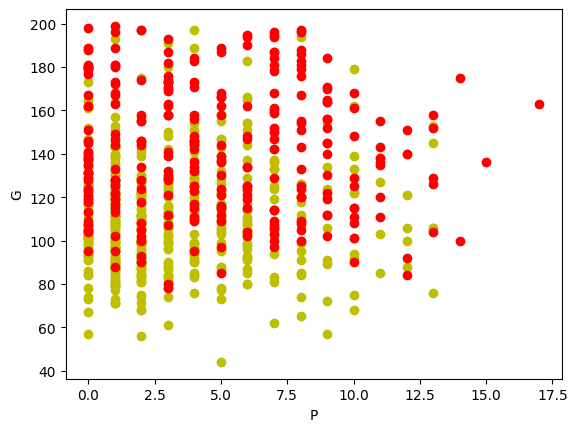

In [ ]:
plt.scatter(df[ df['Outcome']==0.0 ]['Pregnancies'], df[ df['Outcome']==0.0 ]['Glucose'], marker='o', label=0, color='y')
plt.scatter(df[ df['Outcome']==1.0 ]['Pregnancies'], df[ df['Outcome']==1.0 ]['Glucose'], marker='o', label=1, color='r')
plt.xlabel('P')
plt.ylabel('G')
plt.show()